<a href="https://colab.research.google.com/github/kojeda603/analisis_exploratorio_de_datos/blob/main/02_Copia_de_EDA_pandas_netflix_enunciados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# \# Análisis Exploratorio de Datos. PROGRAMA DE CIENCIA DE DATOS UNAB
## Dataset: Netflix (`netflix_data.csv`)  
**Objetivo:** este cuaderno contiene únicamente *enunciados* (guía de trabajo) para desarrollar un EDA paso a paso con **pandas**.  

**Archivo de entrada esperado:** `netflix_data.csv` (en este entorno, suele estar disponible en `/mnt/data/netflix_data.csv`).  

**Fecha de generación:** 06 Enero 2026


---

## 1. Introducción al análisis exploratorio de datos

1. Define con tus palabras qué es el análisis exploratorio de datos (EDA) y por qué es una etapa previa necesaria antes de modelar.
2. Propón 5 preguntas analíticas que te gustaría responder con este dataset (ejemplos: tendencias temporales, distribución de géneros, países con más títulos, duración, etc.).
3. Identifica qué sesgos o limitaciones podrían esperarse en una base de datos de catálogo (cobertura, cambios en el tiempo, variables faltantes, etc.).


# **CARGAR EL AMBIENTE DE DRIVE CON EL MÓDULO GOOGLE COLAB**

In [28]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CARGAR EL MÓDULO OS
Este módulo proporciona una forma portátil de utilizar funcionalidades que dependen del sistema operativo.

In [29]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/ciencia_de_datos'

In [30]:
path = '/content/drive/MyDrive/Colab Notebooks/ciencia_de_datos'

In [31]:
os.chdir(path)

In [32]:
os.listdir()

['netflix_data.csv',
 '01_netflix.ipynb',
 'Copia de EDA_pandas_netflix_enunciados.ipynb']

In [33]:
"/content/drive/MyDrive/Colab Notebooks/ciencia_de_datos"

'/content/drive/MyDrive/Colab Notebooks/ciencia_de_datos'

EN LA SIGUIENT TAMBIÉN TIENES LA OPCIÓN DE CARGAR TUS DATOS DESDE TU COMPUTADOR

In [34]:
"""from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))"""

'from google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [35]:
# REVISAMOS EL CONTENIDO DE NUESTRA CARPETA DRIVE CON ÉL MÉTODO listdir() de os


---

## 2. Preparación del entorno y carga del dataset

1. Importa las librerías necesarias para análisis de datos (al menos `pandas` y `numpy`; opcionalmente `matplotlib` y 'seaborn').


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


2. Carga el archivo `netflix_data.csv` en un DataFrame llamado `netflix_df`.


In [37]:
netflix = pd.read_csv('netflix_data.csv')

3. Verifica que la carga fue exitosa mostrando las primeras 5 a 10 filas.



In [38]:
print(netflix.tail(1))

     show_id   type   title     director  \
4811   s7784  Movie  Zubaan  Mozez Singh   

                                                   cast country  \
4811  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   India   

         date_added  release_year  duration  \
4811  March 2, 2019          2015       111   

                                            description   genre  
4811  A scrappy but poor boy worms his way into a ty...  Dramas  


In [39]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
8,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
9,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,103,A farmer pens a confession admitting to his wi...,Dramas


4. Comprueba si las columnas fueron interpretadas con los tipos de datos esperados (por ejemplo, fechas como `datetime`, números como `int/float`).

In [40]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


---

## 3. Estructura y “mapa” del DataFrame

1. Reporta dimensiones (filas, columnas).
2. ¿Cuáles variables consideras categóricas de interés?
3. ¿Podemos hacer una representación gráfica?


# DIMENSION DE LA DATA.FRAME

In [41]:
netflix.shape

(4812, 11)

In [42]:
filas,columnas = netflix.shape

In [43]:
filas

4812

In [44]:
columnas

11

In [45]:
print(f"La data frame netflix tiene {filas} filas y tiene {columnas} columnas")

La data frame netflix tiene 4812 filas y tiene 11 columnas


# NOMBRES DE LAS COLUMNAS

In [46]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

# ¿CÓMO PUEDO DESCRIBIR DE FORMA GLOBAL MI DATA.FRAME?
## ¿CÓMO DESCRIBIMOS UNA VARIABLE CATEGÓRICA?

In [47]:
round(netflix.describe())

,release_year,duration
count,4812.0,4812.0
mean,2013.0,100.0
std,10.0,31.0
min,1942.0,1.0
25%,2011.0,88.0
50%,2016.0,99.0
75%,2018.0,116.0
max,2021.0,253.0


In [48]:
netflix.describe(include='object')

,show_id,type,title,director,cast,country,date_added,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812,4812
unique,4812,2,4812,3615,4690,72,1292,4807,31
top,s7784,Movie,Zubaan,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",A young Han Solo tries to settle an old score ...,Dramas
freq,1,4677,1,18,10,1886,100,2,1343


INVESTIGAR COMO EN 1 SOLA LINEA OBTENGO TODAS LAS CATEGORIAS DE MI DF

In [49]:
netflix['genre'].unique()

array(['Dramas', 'Horror Movies', 'Action', 'International TV',
       'Documentaries', 'Independent Movies', 'Comedies', 'Sci-Fi',
       'International Movies', 'Children', 'TV Shows', 'Uncategorized',
       'Classic Movies', 'Thrillers', 'Stand-Up', 'Anime Features',
       'Music', 'Anime Series', 'Kids', 'Docuseries', 'Crime TV',
       'British TV', 'Cult Movies', 'TV Action', 'Romantic TV',
       'TV Horror', 'Romantic Movies', 'TV Comedies', 'Classic',
       'Reality TV', 'LGBTQ Movies'], dtype=object)

---

## 6. EDA univariado (categóricas)

1. Para la variable de tipo de contenido (p. ej., Movie/TV Show):
   - Calcula frecuencias absolutas y relativas
   - Interpreta el balance de clases
2. Para país (`country`) y género/categoría (`genre`):
     - Construye un ranking de países y géneros más frecuentes
3. Para `rating`
   - Evalúa la distribución
  


In [50]:
netflix['type'].value_counts()

,count
type,
Movie,4677
TV Show,135


In [51]:
netflix['genre'].value_counts()*100/filas

,count
genre,
Dramas,27.909393
Comedies,21.384040
Action,14.463840
Children,8.748961
Documentaries,7.315046
Stand-Up,5.881131
Horror Movies,4.966750
International Movies,2.078138
Classic Movies,1.433915


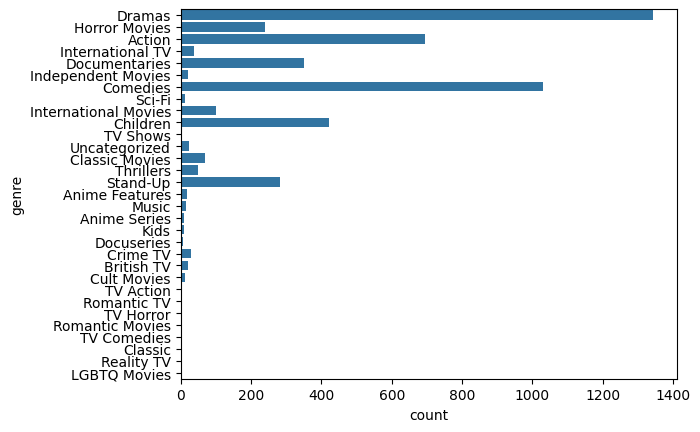

In [52]:
sns.countplot(data=netflix, y='genre')
plt.show()

---

## 7. EDA univariado (numéricas)

1. Para `release_year`:
   - Describe su distribución (mínimo, máximo, mediana, percentiles)
   - Identifica años extremos y valida si son plausibles
2. Para duración numérica (minutos):
   - Resume estadísticos descriptivos
   - Identifica asimetrías (sesgo) y posibles outliers
3. Discute si conviene transformar

In [53]:
print(netflix["release_year"].min())
print(netflix["release_year"].max())
print(netflix["release_year"].median())

1942
2021
2016.0


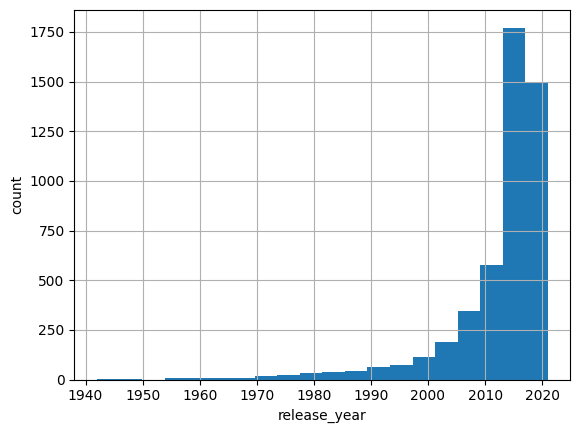

In [54]:
netflix['release_year'].hist(bins=20)
plt.xlabel('release_year')
plt.ylabel('count')
plt.show()

---

## 10. Visualización básica (con intención analítica)

1. Construye visualizaciones con un propósito explícito:
   - Barras: conteos por tipo, top países, top géneros
   - Histogramas: duración (minutos) para películas

2. En cada gráfico:
   - Especifica la pregunta que responde
   - Define qué patrón esperas ver
   - Interpreta el resultado observado


---

## 11. Variables textuales (introducción ligera)

1. Identifica columnas de texto libre (p. ej., `description`, `cast`, `director`).
2. Define un plan mínimo:
   - Longitud del texto (número de caracteres/palabras)
   - Frecuencias de términos (tokenización básica)
   - Palabras vacías (stopwords) en inglés o español según aplique
3. Plantea hipótesis: ¿el texto de descripción diferencia bien entre géneros o ratings?


---

## 12. Preguntas integradoras (mini-proyecto dentro del cuaderno)

Responde, con evidencia reproducible, al menos 3 de estas preguntas:

1. ¿Qué país tiene mayor cantidad de títulos y cómo cambia esa dominancia en el tiempo?
2. ¿Qué géneros crecen más rápido en títulos agregados por año?
3. ¿Cuál es la duración típica de películas por década de lanzamiento (release_year)?
4. ¿Qué combinación de (tipo, rating) es la más frecuente?
5. ¿Existen indicios de que el catálogo agregado recientemente sea más “nuevo” (menor rezago producción-adición)?


---

## 13. Conclusiones y próximos pasos

1. Resume hallazgos en 8 puntos, separando:
   - Hallazgos descriptivos sólidos
   - Patrones sugerentes (hipótesis)
   - Limitaciones del dataset


TRABAJO EN CLASE

In [55]:
df_movies = netflix[netflix['type']=='Movie']

In [56]:
df_indian_movies = df_movies[df_movies['country']=='India']

In [57]:
df_indian_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
8,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies
14,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,124,"On India's Independence Day, a zany mishap in ...",Comedies
15,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,110,After accidentally connecting over the Interne...,Dramas
16,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,128,"A taxi driver, a gangster and an athlete strug...",Action


In [58]:
df_indian_dramas_movies = df_indian_movies[df_indian_movies['genre']=='Dramas']

In [59]:
df_indian_dramas_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
15,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,110,After accidentally connecting over the Interne...,Dramas
17,s23,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,"September 15, 2018",2017,117,A successful writer returns to the town that l...,Dramas
18,s24,Movie,​Mayurakshi,Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,"September 15, 2018",2017,100,When a middle-aged divorcee returns to Kolkata...,Dramas
40,s60,Movie,1000 Rupee Note,Shrihari Sathe,"Usha Naik, Sandeep Pathak, Shrikant Yadav, Gan...",India,"December 1, 2016",2014,89,After randomly receiving a handsome political ...,Dramas
97,s137,Movie,7 Khoon Maaf,Vishal Bhardwaj,"Priyanka Chopra, Neil Nitin Mukesh, John Abrah...",India,"August 2, 2018",2011,148,"Spiced liberally with black comedy, this Bolly...",Dramas


In [60]:
df_indian_dramas_movies_2000_a_2009 = df_indian_dramas_movies[df_indian_dramas_movies['release_year'].between(2000, 2009)]


In [61]:
df_indian_dramas_movies_2000_a_2009.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
243,s347,Movie,Ahista Ahista,Shivam Nair,"Abhay Deol, Soha Ali Khan, Shayan Munshi, Kami...",India,"December 31, 2019",2006,122,"Stood up by her groom at the altar, a young wo...",Dramas
385,s556,Movie,Anwar,Manish Jha,"Siddharth Koirala, Nauheed Cyrusi, Manisha Koi...",India,"December 31, 2019",2007,134,Seeking refuge in a Hindu temple after the tra...,Dramas
386,s561,Movie,Apaharan,Prakash Jha,"Ajay Devgn, Nana Patekar, Bipasha Basu, Ayub K...",India,"January 8, 2021",2005,161,Raised under the condescending eye of his acti...,Dramas
476,s700,Movie,Badha,"Sumitra Bhave, Sunil Sukthankar","Amruta Subhash, Rajesh More, Devika Daftardar,...",India,"January 1, 2018",2006,91,A young woman who is suspected of practicing b...,Dramas
494,s730,Movie,Barah Aana,Raja Menon,"Naseeruddin Shah, Arjun Mathur, Vijay Raaz, Ta...",India,"December 31, 2019",2009,95,After futile attempts to better their lives wi...,Dramas


In [71]:
#Resumido

(netflix[(netflix['country']=='India') &
 (netflix['type']=='Movie') &
  (netflix['genre']=='Dramas') &
   (netflix['release_year'].between(2000, 2009))]['duration'].agg(['min', 'max', 'median', "mean"]))

,duration
min,91.0
max,224.0
median,137.0
mean,141.5


In [72]:
netflix.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


<Axes: >

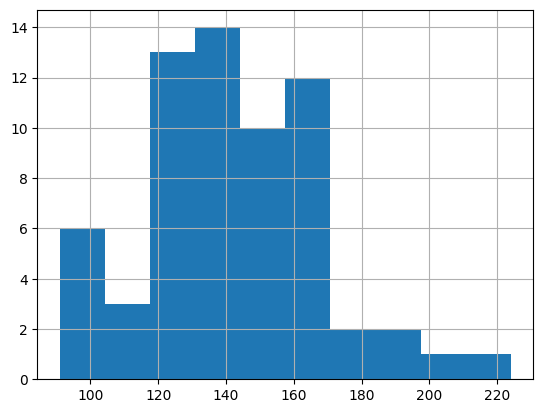

In [63]:
#Resumido

(netflix[(netflix['country']=='India') &
 (netflix['type']=='Movie') &
  (netflix['genre']=='Dramas') &
   (netflix['release_year'].between(2000, 2009))]['duration'].hist())

In [64]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [65]:
# Max y min directamente
max_duration = df_indian_dramas_movies_2000_a_2009['duration'].max()
min_duration = df_indian_dramas_movies_2000_a_2009['duration'].min()

print(f"Duración máxima: {max_duration} minutos")
print(f"Duración mínima: {min_duration} minutos")

Duración máxima: 224 minutos
Duración mínima: 91 minutos


In [66]:
max_title = df_indian_dramas_movies_2000_a_2009[df_indian_dramas_movies_2000_a_2009['duration'] == max_duration]['title'].values[0]
min_title = df_indian_dramas_movies_2000_a_2009[df_indian_dramas_movies_2000_a_2009['duration'] == min_duration]['title'].values[0]

print(f"\nPelícula más larga: {max_title} con {max_duration} minutos")
print(f"Película más corta: {min_title} con {min_duration} minutos")


Película más larga: Lagaan con 224 minutos
Película más corta: Badha con 91 minutos


### TAREA
Como uso el metodo f string para encontrar max,min y medianos

In [73]:
stats = netflix[(netflix['country']=='India') &
 (netflix['type']=='Movie') &
  (netflix['genre']=='Dramas') &
   (netflix['release_year'].between(2000, 2009))]['duration'].agg(['min', 'max', 'median', 'mean'])

print(f"Min: {stats['min']} | Max: {stats['max']} | Mediana: {stats['median']} | Media: {stats['mean']:.2f}")

Min: 91.0 | Max: 224.0 | Mediana: 137.0 | Media: 141.50
